In [115]:
import time
import random
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

In [116]:
chrome_options = Options()
chrome_options.add_argument("--headless") 
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

In [117]:
def search_images(query):
    url = f"https://www.pinterest.com/search/pins/?q={query}&rs=typed"
    driver.get(url)
    time.sleep(5)
    
    for _ in range(3): 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(5) 

    image_elements = driver.find_elements(By.CSS_SELECTOR, 'img[src]')
    image_urls = [img.get_attribute('src') for img in image_elements if img.get_attribute('src')]

    if not image_urls:
        print("Nenhuma imagem encontrada.")
        
    return image_urls

In [118]:
def complete_image_access(url):
    try:
        driver.get(url)
        time.sleep(5) 
        
        high_res_image = driver.find_element(By.CSS_SELECTOR, 'img[src]')
        high_res_url = high_res_image.get_attribute('src')
        
        return high_res_url
    except Exception as e:
        print(f"Error: {e}")
        return None

In [119]:
query = "ferret"
ferret_images = search_images(query)

High quality URL image: https://i.pinimg.com/236x/5f/7c/52/5f7c52fefa6bab624e00dfb06f77ebbe.jpg


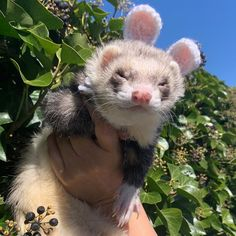

In [120]:
if ferret_images:
    img_url = random.choice(ferret_images)
    high_quality_img = complete_image_access(img_url)
    
    if high_quality_img:
        print(f"High quality URL image: {high_quality_img}")
        
        response = requests.get(high_quality_img)
        img = Image.open(BytesIO(response.content))
        display(img) 
    else:
        print("Error")
else:
    print(f"None '{query}' image found on Pinterest.")

In [114]:
driver.quit()